In [52]:
import pandas as pd
import gpxpy
import matplotlib.pyplot as plt
import os

from pathlib import Path

from geopandas import GeoDataFrame
from shapely.geometry import Point

In [5]:
gpx_path = '/home/faraway/march.gpx'
with open(gpx_path) as f:
    gpx = gpxpy.parse(f)

In [29]:
gpx.waypoints

[GPXWaypoint(39.5756101, -104.9774281, time=datetime.datetime(2023, 3, 1, 0, 7, 13, 650000, tzinfo=SimpleTZ("Z")), name='Puma Park', description='7900 S Ogden Way, Littleton, CO 80122, USA', comment='7900 S Ogden Way, Littleton, CO 80122, USA'),
 GPXWaypoint(39.5808645, -104.9836074, time=datetime.datetime(2023, 3, 1, 0, 22, 53, 648000, tzinfo=SimpleTZ("Z")), name='AMLI Littleton Village', description='399 E Dry Creek Rd, Littleton, CO 80122, USA', comment='399 E Dry Creek Rd, Littleton, CO 80122, USA'),
 GPXWaypoint(39.5751988, -104.9711721, time=datetime.datetime(2023, 3, 1, 0, 51, 29, 632000, tzinfo=SimpleTZ("Z")), name='1452 E Long Pl, Centennial, CO 80122-3021, USA', description='1452 E Long Pl, Centennial, CO 80122-3021, USA', comment='1452 E Long Pl, Centennial, CO 80122-3021, USA'),
 GPXWaypoint(39.5922657, -104.8869146, time=datetime.datetime(2023, 3, 1, 1, 21, 17, 19000, tzinfo=SimpleTZ("Z")), name='Southgate', description='6886 S Yosemite St, Centennial, CO 80112, USA', comm

In [32]:
def gpx2df(gpx):    
    data = gpx.waypoints

    ## Start Position
    start = data[0]
    ## End Position
    finish = data[-1]

    df = pd.DataFrame(columns=['lon', 'lat', 'alt', 'time'])
    for point in data:
        df = df._append({'lon': point.longitude, 'lat' : point.latitude, 'alt' : point.elevation, 'time' : point.time}, ignore_index=True)
    return data, df

In [33]:
data,df = gpx2df(gpx)

In [38]:
df

,lon,lat,alt,time
0,-104.977428,39.575610,None,2023-03-01 00:07:13.650000+00:00
1,-104.983607,39.580864,None,2023-03-01 00:22:53.648000+00:00
2,-104.971172,39.575199,None,2023-03-01 00:51:29.632000+00:00
3,-104.886915,39.592266,None,2023-03-01 01:21:17.019000+00:00
4,-104.971172,39.575199,None,2023-03-01 02:14:44.497000+00:00
...,...,...,...,...
149,-75.149509,39.937578,None,2023-03-31 15:50:49.247000+00:00
150,-75.158162,39.952271,None,2023-03-31 17:55:14.759000+00:00
151,-75.156721,39.948006,None,2023-03-31 18:55:38.281000+00:00
152,-75.391573,40.088370,None,2023-03-31 19:47:51.586000+00:00


In [36]:
# Create Geopandas Dataframe
geometry = [Point(xy) for xy in zip(df.lon, df.lat)]
crs = 'epsg:4326'
gdf = GeoDataFrame(df, crs=crs, geometry=geometry)
gdf['entity_id']=gdf.index

<Axes: >

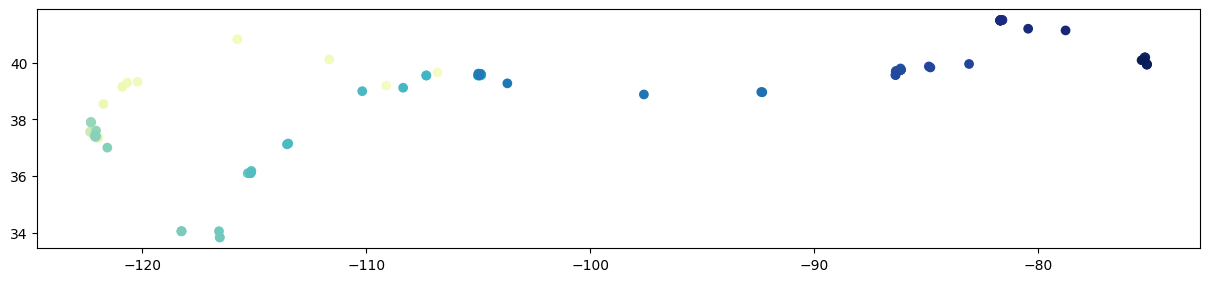

In [37]:
# Lets plot it and classify through speed
fig, ax = plt.subplots(figsize=(15,12), subplot_kw={'aspect':'equal'})
gdf.plot(cmap='YlGnBu',ax=ax)

In [39]:
gpx.tracks

[GPXTrack(name='Walking', segments=[GPXTrackSegment(points=[...])]),
 GPXTrack(name='Walking', segments=[GPXTrackSegment(points=[...])]),
 GPXTrack(name='In Passenger Vehicle', segments=[GPXTrackSegment(points=[...])]),
 GPXTrack(name='In Passenger Vehicle', segments=[GPXTrackSegment(points=[...])]),
 GPXTrack(name='In Passenger Vehicle', segments=[GPXTrackSegment(points=[...])]),
 GPXTrack(name='Walking', segments=[GPXTrackSegment(points=[...])]),
 GPXTrack(name='In Passenger Vehicle', segments=[GPXTrackSegment(points=[...])]),
 GPXTrack(name='In Passenger Vehicle', segments=[GPXTrackSegment(points=[...])]),
 GPXTrack(name='In Passenger Vehicle', segments=[GPXTrackSegment(points=[...])]),
 GPXTrack(name='In Passenger Vehicle', segments=[GPXTrackSegment(points=[...])]),
 GPXTrack(name='In Passenger Vehicle', segments=[GPXTrackSegment(points=[...])]),
 GPXTrack(name='In Passenger Vehicle', segments=[GPXTrackSegment(points=[...])]),
 GPXTrack(name='In Passenger Vehicle', segments=[GPXTra

In [43]:
gdf['time']

0     2023-03-01 00:07:13.650000+00:00
1     2023-03-01 00:22:53.648000+00:00
2     2023-03-01 00:51:29.632000+00:00
3     2023-03-01 01:21:17.019000+00:00
4     2023-03-01 02:14:44.497000+00:00
                    ...               
149   2023-03-31 15:50:49.247000+00:00
150   2023-03-31 17:55:14.759000+00:00
151   2023-03-31 18:55:38.281000+00:00
152   2023-03-31 19:47:51.586000+00:00
153   2023-03-31 20:39:28.840000+00:00
Name: time, Length: 154, dtype: datetime64[ns, SimpleTZ("Z")]

In [44]:
gdf['time'] = str(gdf['time'])

In [45]:
gdf['time']

0      0     2023-03-01 00:07:13.650000+00:00\n1     ...
1      0     2023-03-01 00:07:13.650000+00:00\n1     ...
2      0     2023-03-01 00:07:13.650000+00:00\n1     ...
3      0     2023-03-01 00:07:13.650000+00:00\n1     ...
4      0     2023-03-01 00:07:13.650000+00:00\n1     ...
                             ...                        
149    0     2023-03-01 00:07:13.650000+00:00\n1     ...
150    0     2023-03-01 00:07:13.650000+00:00\n1     ...
151    0     2023-03-01 00:07:13.650000+00:00\n1     ...
152    0     2023-03-01 00:07:13.650000+00:00\n1     ...
153    0     2023-03-01 00:07:13.650000+00:00\n1     ...
Name: time, Length: 154, dtype: object

In [46]:
gdf.explore()

In [47]:
gpx.tracks[0]

GPXTrack(name='Walking', segments=[GPXTrackSegment(points=[...])])

In [51]:
gpx.tracks[0].segments[0].points

[GPXTrackPoint(39.5772547, -104.9787251, time=datetime.datetime(2023, 3, 1, 0, 13, 39, 28000, tzinfo=SimpleTZ("Z"))),
 GPXTrackPoint(39.5773086, -104.9785766, time=datetime.datetime(2023, 3, 1, 0, 13, 39, 28000, tzinfo=SimpleTZ("Z"))),
 GPXTrackPoint(39.5767555, -104.9805679, time=datetime.datetime(2023, 3, 1, 0, 13, 39, 28000, tzinfo=SimpleTZ("Z"))),
 GPXTrackPoint(39.5803718, -104.9833374, time=datetime.datetime(2023, 3, 1, 0, 13, 39, 28000, tzinfo=SimpleTZ("Z"))),
 GPXTrackPoint(39.5803682, -104.9834954, time=datetime.datetime(2023, 3, 1, 0, 22, 53, 648000, tzinfo=SimpleTZ("Z")))]

In [55]:
os.getcwd()

'/home/faraway/dev/prettymaps'

In [54]:
os.chdir("dev/prettymaps")

In [56]:
p = gpx.tracks[0].segments[0].points[0]

In [57]:
p

GPXTrackPoint(39.5772547, -104.9787251, time=datetime.datetime(2023, 3, 1, 0, 13, 39, 28000, tzinfo=SimpleTZ("Z")))

In [63]:
dir(p)

['__add__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'adjust_time',
 'age_of_dgps_data',
 'comment',
 'course',
 'course_between',
 'description',
 'dgps_id',
 'distance_2d',
 'distance_3d',
 'elevation',
 'elevation_angle',
 'extensions',
 'geoid_height',
 'gpx_10_fields',
 'gpx_11_fields',
 'has_elevation',
 'horizontal_dilution',
 'latitude',
 'link',
 'link_text',
 'link_type',
 'longitude',
 'magnetic_variation',
 'move',
 'name',
 'position_dilution',
 'remove_elevation',
 'remove_time',
 'satellites',
 'source',
 'speed',
 'speed_between',
 'symbol',
 'time',
 'time_difference',
 'type',
 'type_of_gpx_fix',
 'vertical_dilution']

In [64]:
p.latitude

39.5772547

In [65]:
p.longitude

-104.9787251